In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from scipy.stats import sem

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotx

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

## Load results

In [26]:
all_out = glob("out/**/*.pkl")

In [27]:
all_out = [load_pickle(p) for p in all_out]

In [28]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    res = {
        'train_size': out['train_size'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
        "num_classes": out['num_classes']
    }

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['xgboost_baseline']['accuracy'], 
        'f1_macro': out['xgboost_baseline']['f1_macro'],
        'f1_micro': out['xgboost_baseline']['f1_micro'],
        'kappa': out['xgboost_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['tabpfn_baseline']['accuracy'], 
        'f1_macro': out['tabpfn_baseline']['f1_macro'],
        'f1_micro': out['tabpfn_baseline']['f1_micro'],
        'kappa': out['tabpfn_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    extracted_res.append(res)
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [29]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [30]:
grouped_res = res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count', sem])

In [31]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count', sem])

In [32]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count', sem])

In [33]:
grouped_res.loc[2,:]

frac_valid                  accuracy                            \
                 mean  std count  sem      mean       std count       sem   
train_size                                                                  
10                1.0  0.0     4  0.0  0.583000  0.064114     4  0.032057   
20                1.0  0.0     5  0.0  0.676800  0.034339     5  0.015357   
50                1.0  0.0     5  0.0  0.742400  0.046355     5  0.020731   
100               1.0  0.0     5  0.0  0.871200  0.042464     5  0.018991   
200               1.0  0.0     3  0.0  0.934667  0.015144     3  0.008743   
500               1.0  0.0     5  0.0  0.933600  0.013145     5  0.005879   

            f1_macro                            f1_micro                  \
                mean       std count       sem      mean       std count   
train_size                                                                 
10          0.537379  0.106531     4  0.053266  0.583000  0.064114     4   
20          0.664946  0.050435     5  0.022555  0.676800  0.034339     5   
50          0.740264  0.048005     5  0.021468  0.742400  0.046355     5   
100         0.870830  0.042595     5  0.019049  0.871200  0.042464     5   
200         0.934654  0.015132     3  0.008736  0.934667  0.015144     3   
500         0.933561  0.013145     5  0.005879  0.933600  0.013145     5   

                         kappa                            
                 sem      mean       std count       sem  
train_size                                                
10          0.032057  0.166000  0.128229     4  0.064114  
20          0.015357  0.353600  0.068679     5  0.030714  
50          0.020731  0.484800  0.092710     5  0.041461  
100         0.018991  0.742400  0.084928     5  0.037981  
200         0.008743  0.869333  0.030288     3  0.017487  
500         0.005879  0.867200  0.026291     5  0.011758

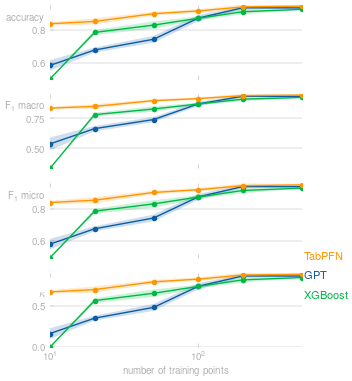

In [34]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2,:].index,
            grouped_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[2,:].index,
            grouped_res.loc[2,:][metric]['mean'] - grouped_res.loc[2,:][metric]['sem'],
            grouped_res.loc[2,:][metric]['mean'] + grouped_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['sem'],
            grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['sem'],
            grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )


    matplotx.line_labels(ax[-1], fontsize=8)
    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)

    ax[0].set_xscale('log')

    fig.savefig('polymner-classification_results_2.pdf', bbox_inches='tight')

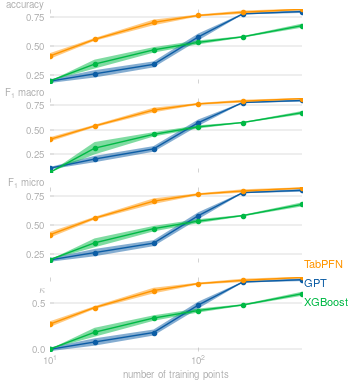

In [35]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5,:].index,
            grouped_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[5,:].index,
            grouped_res.loc[5,:][metric]['mean'] - grouped_res.loc[5,:][metric]['sem'],
            grouped_res.loc[5,:][metric]['mean'] + grouped_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['sem'],
            grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['sem'],
            grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )

    matplotx.line_labels(ax[-1], fontsize=8)
    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)

    ax[0].set_xscale('log')
    fig.savefig('polymner-classification_results_5.pdf', bbox_inches='tight')